In [93]:
# Author: Shaik Faizan Roshan Ali
# Date: 19th August 2021
# Email: alsahercoder@gmail.com
# About: Linear Regression for Boston House Price Prediction dataset

In [74]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pylab as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [51]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
# loading data into dataframe
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["PRICE"] = boston.target # price 1 unit = 1000 $
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [72]:
# checking info of the dataframe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
# Analysing features, target, shape and null values
print("Features: ", df.columns[:-1])
print("Target: ", df.columns[-1])
print("Shape: ", df.shape)
print("Null values:\n", df.isnull().sum(), sep = "")


Features:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Target:  PRICE
Shape:  (506, 14)
Null values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


<AxesSubplot:>

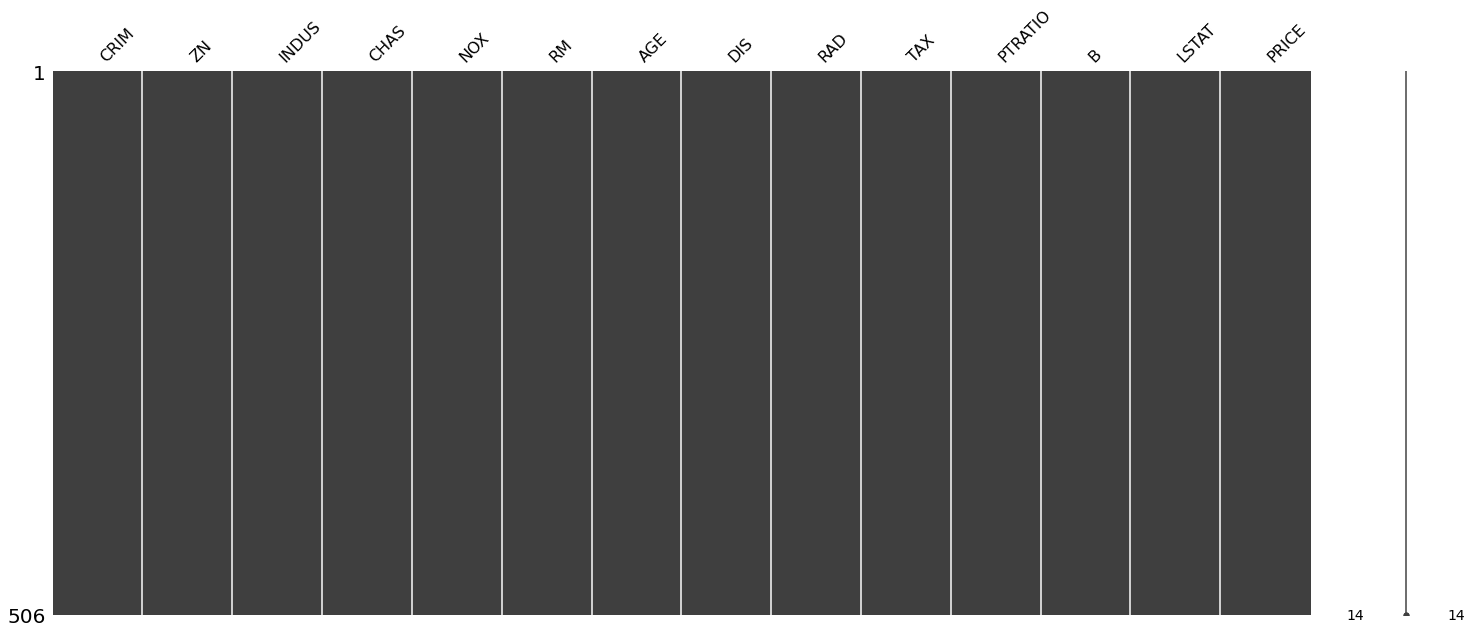

In [54]:
# Visualising matrix for Null Values
msno.matrix(df)

In [55]:
# Analysis coorelation
correlation = df.corrwith(df["PRICE"], method="pearson")
correlation

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
dtype: float64

In [89]:
# Seperating Independent and Dependent variable
X = df.drop(labels=["PRICE"], axis=1) 
Y = df["PRICE"]

# LINEAR REGRESSION

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)
linear_regression = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
model = linear_regression.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print("train score:", train_score)
print("test score:", test_score)

train score: 0.7434997532004697
test score: 0.711226005748494


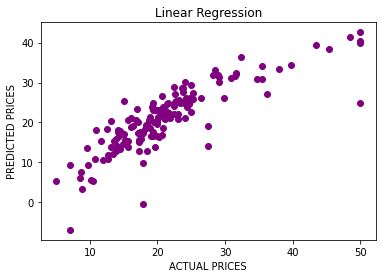

In [85]:
# visualising linear regression

plt.scatter(x=y_test, y=model.predict(x_test), color = "purple")
plt.title("Linear Regression")
plt.xlabel("ACTUAL PRICES")
plt.ylabel("PREDICTED PRICES")
plt.show()

# RIDGE REGRESSION

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)
ridge_regression = Ridge()
model = ridge_regression.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print("train score:", train_score)
print("test score:", test_score)


train score: 0.7415671063241829
test score: 0.7041586727559435


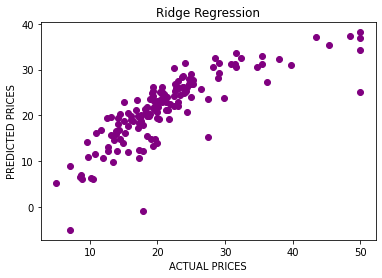

In [88]:
# visualising Ridge regression

plt.scatter(x=y_test, y=model.predict(x_test), color = "red")
plt.title("Ridge Regression")
plt.xlabel("ACTUAL PRICES")
plt.ylabel("PREDICTED PRICES")
plt.show()

# LASSO REGRESSION

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)
lasso_regression = Lasso()
model = lasso_regression.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print("train score:", train_score)
print("test score:", test_score)

train score: 0.6899591642958296
test score: 0.6559060829154338


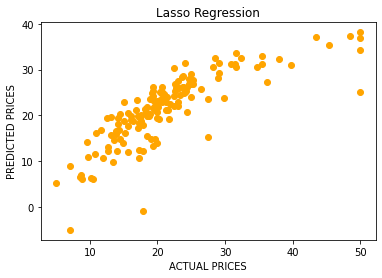

In [92]:
# visualising Lasso regression

plt.scatter(x=y_test, y=model.predict(x_test), color = "orange")
plt.title("Lasso Regression")
plt.xlabel("ACTUAL PRICES")
plt.ylabel("PREDICTED PRICES")
plt.show()